<a href="https://colab.research.google.com/github/ChrisWbe/CursoML/blob/main/reconocimiento_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

#Importamos TF2 y Keras (Kit de herramientas para redes neuronales)
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet se usaran las siguientes librerías
from PIL import Image
import requests
from io import BytesIO

#para reescalar imagen
import cv2

#!rm -rf ./logs/

#tensor flow 2.0
print(tf.__version__)

2.4.0


<h1>Importamos el dataset</h1>
<p>Se usarán 60mil imágenes para entrenar la red y 10mil imágenes para evaluar con qué precision aprendió la red para casificar imágenes. Fashion MNIST directamente desde TensorFlow</p>

In [65]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

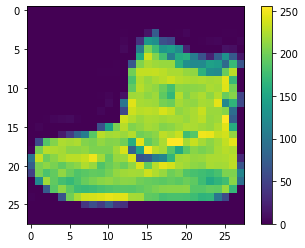

In [66]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Las etiquetas son una matriz de enteros que van de 0 a 9. Corresponden a la clase de vestimenta que representa la imagen

In [67]:
class_name = ['Camiseta','Pantalon','Sueter','Vestido','Abrigo','Sandalia','Camisa','Zapatillas deportiva','Bolso','Botines']

<h2>Explorando datos</h2>

In [68]:
train_images[0].shape

(28, 28)

In [69]:
test_images.shape

(10000, 28, 28)

In [70]:
train_labels.shape

(60000,)

In [71]:
test_labels.shape

(10000,)

In [72]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

<br><br>
Pre-Procesamiento de datos

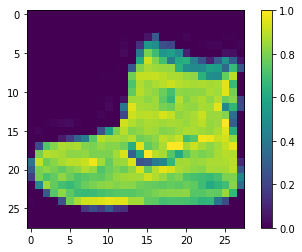

In [73]:
train_images = train_images / 255 #rangos entre 0 y 1
test_images = test_images / 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Se observa que a pedar del cambio de escala, la imagen no cambia

<function matplotlib.pyplot.show>

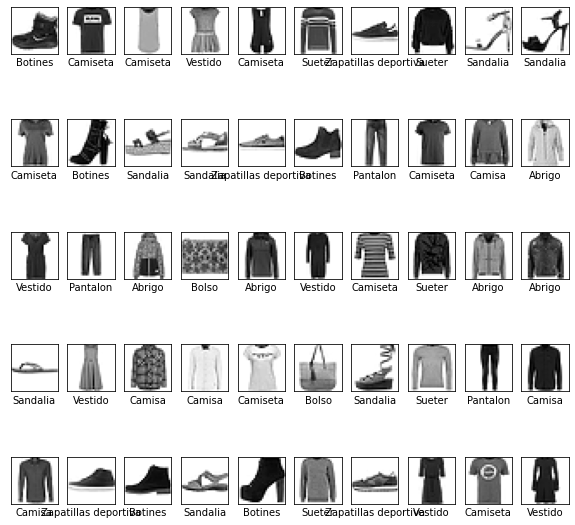

In [74]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show

<h1>Configurando la red neuronal</h1>
Se supone una neurona por pixel en este caso 28x28=784 neuronas en la entrada.<br>
En la capa intermedia se probará con 15 neuronas. (Solo la experiencia determina cuantas neuronas hacen falta en la capa intermedia)<br>
A la salida serán 10 neuronas, una por cada prenda

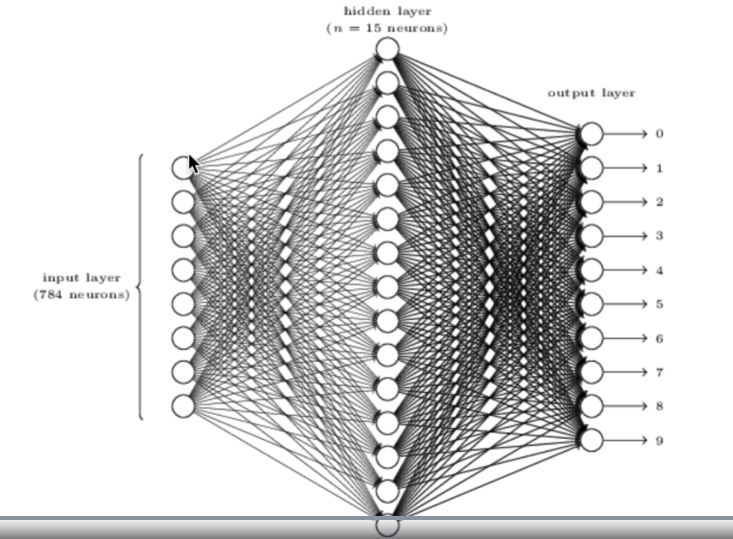

In [75]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #Capa plana, para la entrada
                          keras.layers.Dense(15, activation='relu'), #relu es la funcion de activacion para las imágenes, esta es la capa intermedia
                          keras.layers.Dense(10, activation='softmax') #softmax otra funcion de activacion
])

In [76]:
model.summary() #Sumario de como está configurada la red neuronal

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#optimizer -> como encontrar los pesos adecuados (adam: aproximacion al gradiente descendiente estocástico), #loss -> funcion de coste, #metrics -> como se mide la presicon

<h2>Entrenando el modelo </h2>

In [78]:
chekpoint_path = '/content/'
log_dir="/content/logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(chekpoint_path, save_weights_only=True, verbose=1) #Esto es para almacenar los pesos dado que pueden ser muyy valiosos 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(
    train_images, 
    train_labels, 
    epochs=50, 
    validation_data = (test_images,test_labels), #cada que termina una epoca realiza la evaluacion con estos datos
    callbacks=[cp_callbacks, tensorboard_callback],
    ) #se agrega la cantidad de epocas, 1 epoca es cuando el modelo proceso todas las filas y ajusta todos los pesos fila por fila

    #luego ejecutar en terminal
    #tensorboard --logdir logs/fit

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8515 - accuracy: 0.6954 - val_loss: 0.5533 - val_accuracy: 0.7999

Epoch 00001: saving model to /content/
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4609 - accuracy: 0.8379 - val_loss: 0.4565 - val_accuracy: 0.8412

Epoch 00002: saving model to /content/
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4135 - accuracy: 0.8556 - val_loss: 0.4410 - val_accuracy: 0.8427

Epoch 00003: saving model to /content/
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3924 - accuracy: 0.8611 - val_loss: 0.4293 - val_accuracy: 0.8488

Epoch 00004: saving model to /content/
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3766 - accuracy: 0.8666 - val_loss: 0.4353 - val_accuracy: 0.8458

Epoch 00005: saving model to /content/
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.36

In [79]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Perdidas: ",test_loss, " Precisión: ",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8593
Perdidas:  0.4124634861946106  Precisión:  0.8593000173568726


<h2>Precciones</h2>

In [80]:
prediction = model.predict(test_images)

In [81]:
prediction[0]

array([7.4991353e-06, 2.4734164e-12, 7.5534081e-07, 8.9159874e-16,
       3.2211972e-08, 3.6450233e-03, 3.1251568e-06, 5.1917828e-04,
       2.8594729e-04, 9.9553841e-01], dtype=float32)

In [82]:
np.argmax(prediction[0])

9

Se sabe que la categoria 0 son los botines por tanto, al imprimir la imagen correspondiente se observa que la predicción está en lo correcto

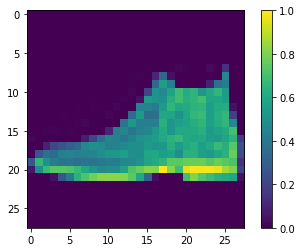

In [83]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<h3>Probemos el modelo con una imagen externa y diferente al dataset</h3>
La imagen que se ingrese debe recibir el mismo procesamiento que las imágenes de entrenamiento

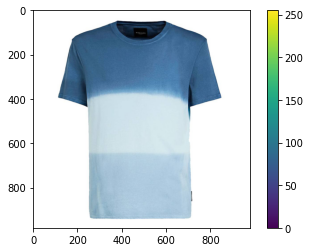

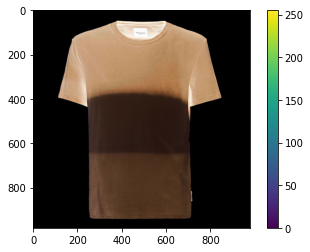

In [84]:
#cargamos imagen a partir de una url
response = requests.get("https://ep01.epimg.net/elpais/imagenes/2020/07/23/icon/1595503857_526299_1595515633_sumario_normal.jpg")
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

#mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

#invertimos la imagen
np_img = 255-np_img
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [85]:
np_img.shape

(982, 980, 3)

In [86]:
#la funcion siguiente recibira una imagen en rgb y devolverá otra imagen en escala de grises
#se realiza esto dado que la imagen de internet tiene 3 dimensiones, y las imagenes de entrenamiento no
def rgb2gray(rgb):
  return np.dot(rgb[...,:3],[0.333,0.333,0.333])

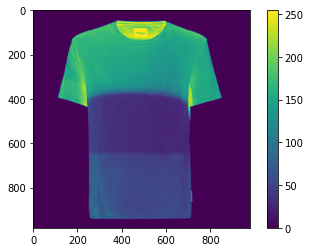

(982, 980)

In [87]:
bw_image = rgb2gray(np_img)
plt.figure()
plt.imshow(bw_image)
plt.colorbar()
plt.grid(False)
plt.show()
bw_image.shape

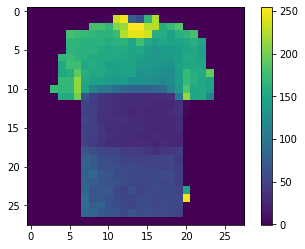

(28, 28)

In [88]:
#ahora se require reescalar la imagen dado que las de entrenamiento son de 28x28
res_img = cv2.resize(bw_image,dsize=(28,28), interpolation=cv2.INTER_CUBIC)
plt.figure()
plt.imshow(res_img)
plt.colorbar()
plt.grid(False)
plt.show()
res_img.shape

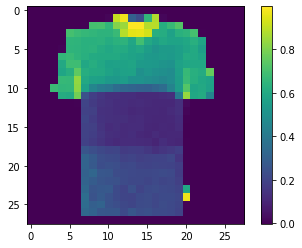

(28, 28)

In [89]:
#ahora se reescalan los valores
res_img = res_img/255
plt.figure()
plt.imshow(res_img)
plt.colorbar()
plt.grid(False)
plt.show()
res_img.shape

In [90]:
#se realiza entonces la prediccion
x = np.zeros((1,28,28)) #se crea un array de 28x28 y un solo elemento
x.shape 

(1, 28, 28)

In [91]:
x[0] = np.array(res_img)

In [92]:
prediction_new_img = model.predict(x)
prediction_new_img

array([[6.2398291e-01, 6.8584844e-09, 3.4101968e-04, 6.2956686e-05,
        1.1577249e-05, 5.7522699e-13, 3.7559876e-01, 1.1976914e-13,
        2.7279282e-06, 8.9870138e-09]], dtype=float32)

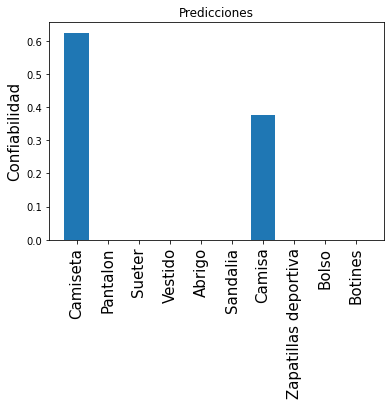

In [93]:
index = np.arange(len(class_name))
plt.bar(index,prediction_new_img[0])
plt.ylabel('Confiabilidad',fontsize=15)
plt.xticks(index,class_name,fontsize=15,rotation=90)
plt.title('Predicciones')
plt.show()

<h2>Creamos un nuevo modelo y lo probamos antes de entrenarlo</h2>

In [94]:
model2 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(15, activation='relu'), 
                          keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [95]:
loss, acc = model2.evaluate(test_images,test_labels)
print("Perdidas: ",loss, " Precisión: ",acc)

313/313 [==============================] - 1s 1ms/step - loss: 2.3367 - accuracy: 0.1290
Perdidas:  2.3355772495269775  Precisión:  0.12960000336170197


Se observa que el modelo sin entrenamiento no tiene muy buena precision

In [96]:
model2.load_weights(chekpoint_path)
loss, acc = model2.evaluate(test_images,test_labels)
print("Perdidas: ",loss, " Precisión: ",acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8593
Perdidas:  0.4124634861946106  Precisión:  0.8593000173568726


Se calibra en base a lo almacenado